In [1]:
pip install pandasql

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install sqlalchemy

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install statsmodels

In [5]:
pip install matplotlib

In [6]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [7]:
import sqlalchemy

In [8]:
from sqlalchemy import create_engine, text

In [9]:
import pandas as pd

In [10]:
from pandasql import sqldf

In [11]:
import math

In [12]:
import matplotlib.pyplot as plt

In [13]:
import seaborn as sns

In [14]:
import numpy as np
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.proportion import confint_proportions_2indep

In [15]:
# Load the CSV file into a pandas DataFrame:

In [16]:
prices = pd.read_csv('prices_results.csv')

In [17]:
reviews = pd.read_csv('reviews_results.csv')

In [18]:
room_types = pd.read_csv('room_types_results.csv')

In [19]:
# SQL queries

In [20]:
# What is the most common room type in NYC Airbnb listings?

In [21]:
# Define a SQL query as a string:

In [22]:
query1 = ''' SELECT room_type,count(*)
FROM room_types
GROUP BY room_type; '''

In [23]:
# Use the sqldf function to run the SQL query on the DataFrame:

In [24]:
common_room_type = sqldf(query1)

In [25]:
# View the results

In [26]:
print(common_room_type)

         room_type  count(*)
0  entire home/apt     13266
1     private room     11356
2      shared room       587


In [27]:
# Plot the most common room type

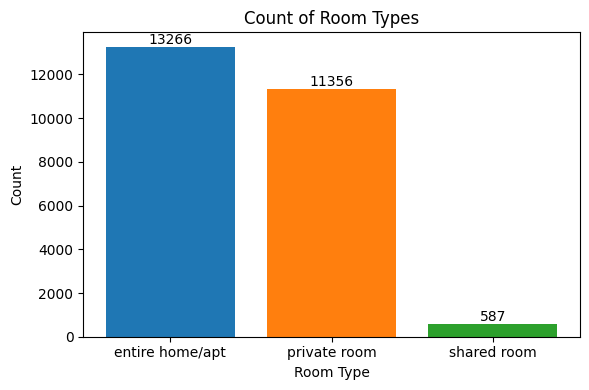

In [28]:
# Execute the SQL query
result = sqldf(query1)

# Define color palette for color blindness friendly colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Plot the graph
plt.figure(figsize=(6, 4))
plt.bar(result['room_type'], result['count(*)'], color=colors)

# Set the x-axis label, y-axis label, and title
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.title('Count of Room Types')

# Display the values on each bar
for i, count in enumerate(result['count(*)']):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [29]:
# What is the average price of a listing by room type?

In [30]:
query2 = ''' SELECT ROUND(avg(price),2),room_type
FROM prices as p
JOIN room_types as rt
ON p.listing_id = rt.listing_id
GROUP BY room_type; '''

In [31]:
average_listing_price = sqldf(query2)

In [32]:
print(average_listing_price)

   ROUND(avg(price),2)        room_type
0               197.17  entire home/apt
1                81.67     private room
2                53.65      shared room


In [33]:
# Plot the average price of a listing by room type

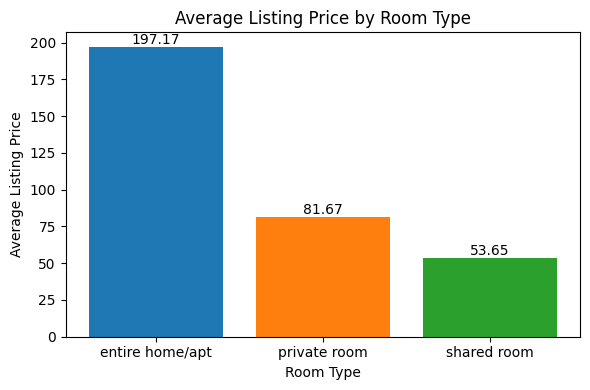

In [34]:
# Execute the SQL query
result = sqldf(query2)

# Define color palette for color blindness friendly colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Plot the graph
plt.figure(figsize=(6, 4))
plt.bar(result['room_type'], result['ROUND(avg(price),2)'], color=colors)

# Set the x-axis label, y-axis label, and title
plt.xlabel('Room Type')
plt.ylabel('Average Listing Price')
plt.title('Average Listing Price by Room Type')

# Display the values on each bar
for i, value in enumerate(result['ROUND(avg(price),2)']):
    plt.text(i, value, f'{value}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [35]:
# Which borough has the highest average price per month?

In [36]:
query3 = ''' SELECT ROUND(avg(price_per_month),2), borough
FROM prices
GROUP BY borough; '''

In [37]:
highest_avg_borough = sqldf(query3)

In [38]:
print(highest_avg_borough)

   ROUND(avg(price_per_month),2)        borough
0                        2410.25          Bronx
1                        3710.06       Brooklyn
2                        5596.69      Manhattan
3                        2823.09         Queens
4                        2617.20  Staten Island


In [39]:
# Plot the borough having the highest average price per month

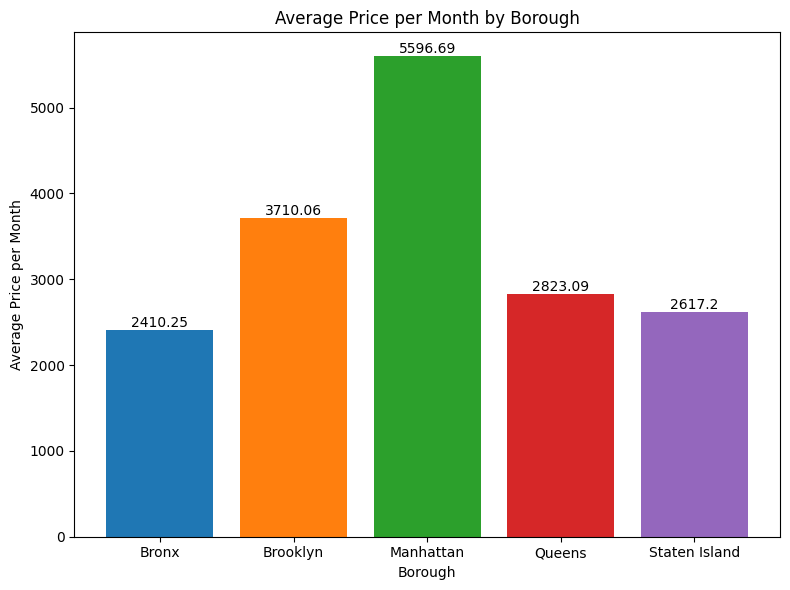

In [40]:
# Execute the SQL query
result = sqldf(query3)

# Define color palette for color blindness friendly colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Plot the graph
plt.figure(figsize=(8, 6))
plt.bar(result['borough'], result['ROUND(avg(price_per_month),2)'], color=colors)

# Set the x-axis label, y-axis label, and title
plt.xlabel('Borough')
plt.ylabel('Average Price per Month')
plt.title('Average Price per Month by Borough')

# Display the values on each bar
for i, value in enumerate(result['ROUND(avg(price_per_month),2)']):
    plt.text(i, value, f'{value}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [41]:
# How many listings of each room type are in each borough?

In [42]:
query4 = ''' SELECT p.borough, rt.room_type,ROUND(count(p.listing_id), 0) as listing_count
FROM prices as p
JOIN room_types as rt
ON p.listing_id = rt.listing_id
GROUP BY p.borough, rt.room_type; '''

In [43]:
count_listing_per_borough = sqldf(query4)

In [44]:
print(count_listing_per_borough)

          borough        room_type  listing_count
0           Bronx  entire home/apt          261.0
1           Bronx     private room          403.0
2           Bronx      shared room           33.0
3        Brooklyn  entire home/apt         5367.0
4        Brooklyn     private room         4906.0
5        Brooklyn      shared room          187.0
6       Manhattan  entire home/apt         6170.0
7       Manhattan     private room         3901.0
8       Manhattan      shared room          251.0
9          Queens  entire home/apt         1335.0
10         Queens     private room         2009.0
11         Queens      shared room          112.0
12  Staten Island  entire home/apt          133.0
13  Staten Island     private room          132.0
14  Staten Island      shared room            2.0


In [45]:
# Plot listings of each room type in each borough

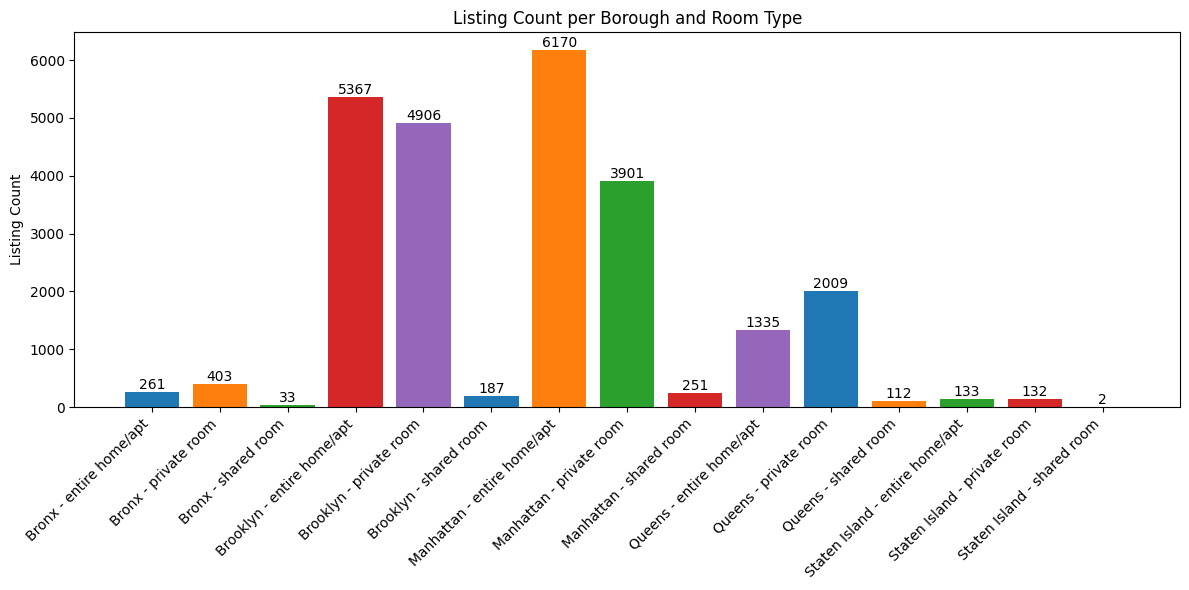

In [46]:
# Sort the DataFrame by borough and room type
sorted_counts = count_listing_per_borough.sort_values(['borough', 'room_type'])

# Define color palette for color blindness friendly colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Create a multi-index for the x-axis labels
x_labels = sorted_counts.apply(lambda row: f"{row['borough']} - {row['room_type']}", axis=1)

# Plot the graph
plt.figure(figsize=(12, 6))
plt.bar(range(len(sorted_counts)), sorted_counts['listing_count'], color=colors)

# Set the x-axis labels, rotation, and spacing
plt.xticks(range(len(sorted_counts)), x_labels, rotation=45, ha='right')

# Set the y-axis label and title
plt.ylabel('Listing Count')
plt.title('Listing Count per Borough and Room Type')

# Display the values on each bar
for i, count in enumerate(sorted_counts['listing_count']):
    plt.text(i, count, str(int(count)), ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [47]:
# How many listings in each room type category have a price of over $500 per night?

In [48]:
query5 = ''' SELECT rt.room_type, COUNT(DISTINCT p.listing_id) as listing_count
FROM prices as p
JOIN room_types as rt
ON p.listing_id = rt.listing_id
WHERE p.price > 500
GROUP BY rt.room_type; '''

In [49]:
count_room_category = sqldf(query5)

In [50]:
print(count_room_category)

         room_type  listing_count
0  entire home/apt            395
1     private room             19
2      shared room              1


In [51]:
# Plot listings in each room type category have a price of over $500 per night

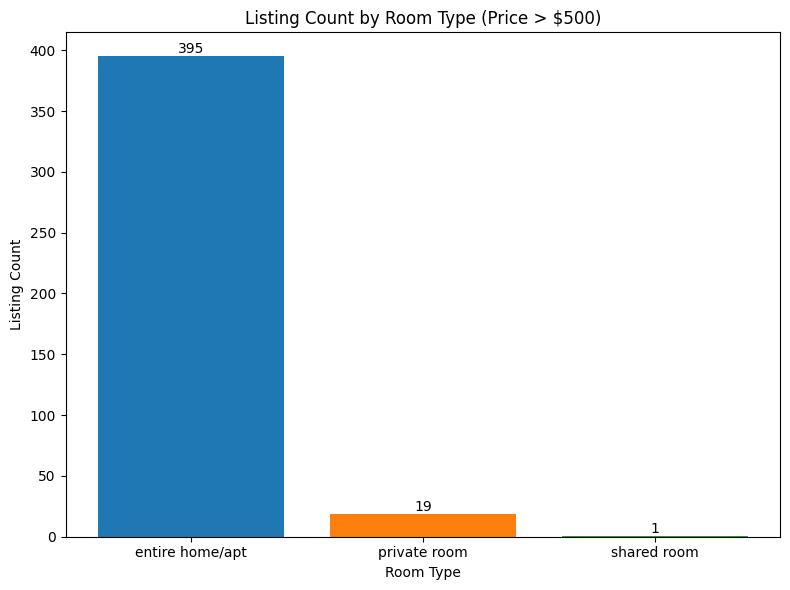

In [52]:
# Sort the DataFrame by room type
sorted_counts = count_room_category.sort_values('room_type')

# Define color palette for color blindness friendly colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Plot the graph
plt.figure(figsize=(8, 6))
plt.bar(sorted_counts['room_type'], sorted_counts['listing_count'], color=colors)

# Set the x-axis label, y-axis label, and title
plt.xlabel('Room Type')
plt.ylabel('Listing Count')
plt.title('Listing Count by Room Type (Price > $500)')

# Display the values on each bar
for i, count in enumerate(sorted_counts['listing_count']):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [53]:
# What is the distribution of listing prices by borough?

In [54]:
query6 = ''' SELECT p.borough,
       MIN(p.price) as min_price,
       MAX(p.price) as max_price,
       ROUND(AVG(p.price),2) as avg_price
FROM prices as p
GROUP BY p.borough; '''

In [55]:
distribution_by_borough = sqldf(query6)

In [56]:
print(distribution_by_borough)

         borough  min_price  max_price  avg_price
0          Bronx         20        670      79.24
1       Brooklyn         10       7500     121.97
2      Manhattan         10       5100     184.00
3         Queens         10       2600      92.81
4  Staten Island         13        300      86.04


In [57]:
# Plot the distribution of listing prices by borough

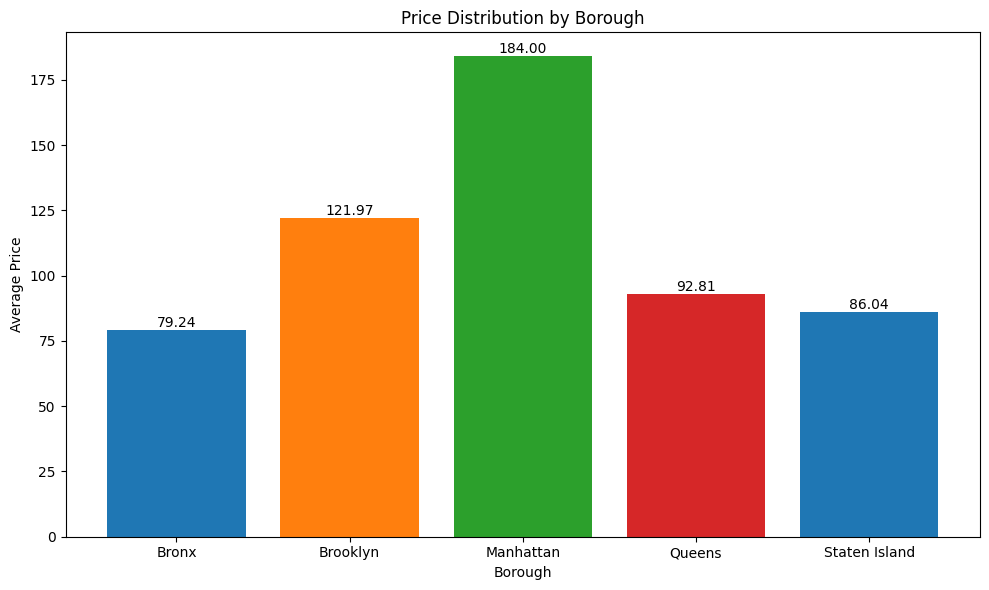

In [58]:
# Sort the DataFrame by borough
sorted_distribution = distribution_by_borough.sort_values('borough')

# Define color palette for color blindness friendly colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Plot the graph
plt.figure(figsize=(10, 6))
plt.bar(sorted_distribution['borough'], sorted_distribution['avg_price'], color=colors)

# Set the x-axis label, y-axis label, and title
plt.xlabel('Borough')
plt.ylabel('Average Price')
plt.title('Price Distribution by Borough')

# Display the values on each bar
for i, value in enumerate(sorted_distribution['avg_price']):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


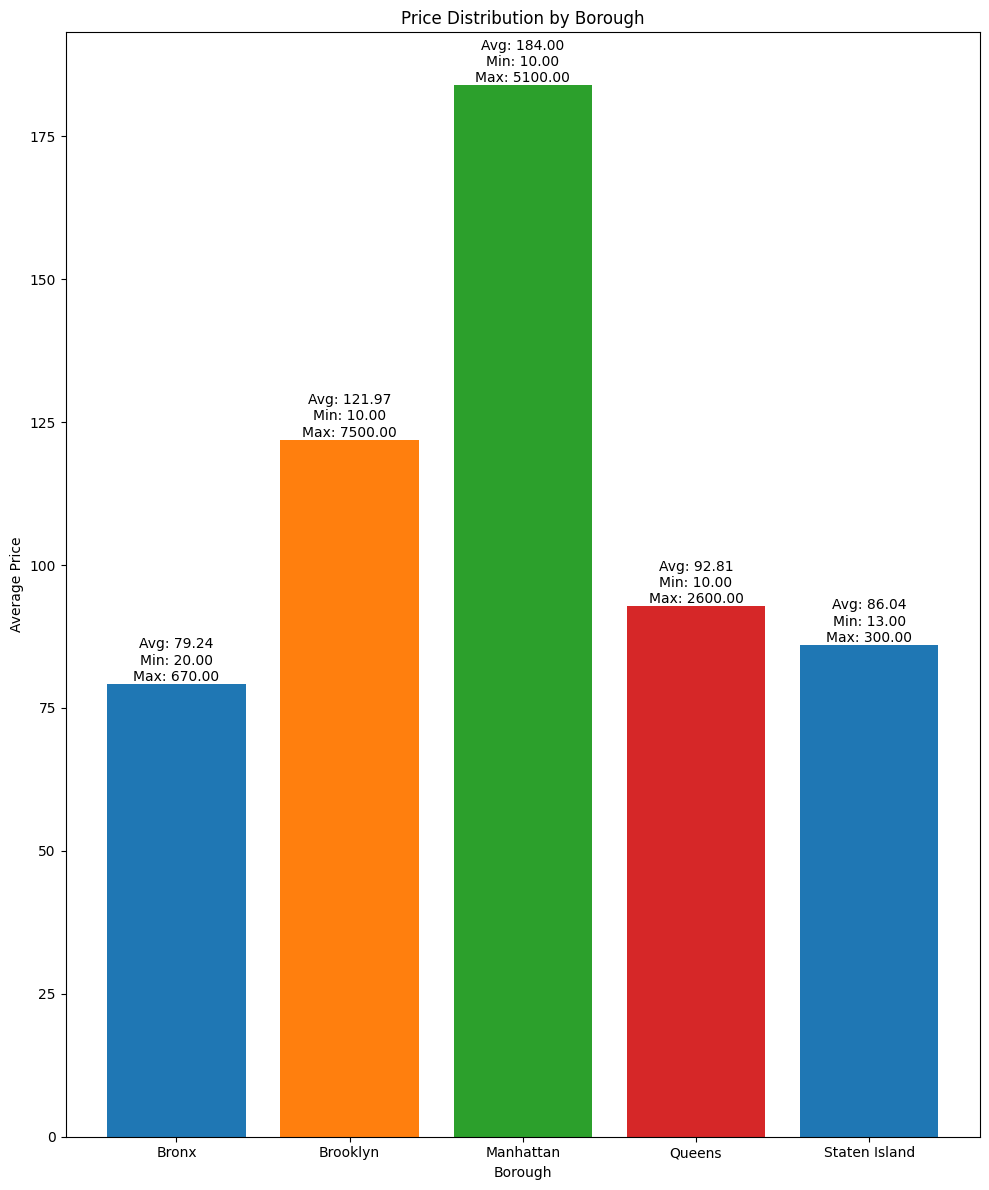

In [71]:
# Sort the DataFrame by borough
sorted_distribution = distribution_by_borough.sort_values('borough')

# Define color palette for color blindness friendly colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Plot the graph
plt.figure(figsize=(10, 12))
plt.bar(sorted_distribution['borough'], sorted_distribution['avg_price'], color=colors)

# Set the x-axis label, y-axis label, and title
plt.xlabel('Borough')
plt.ylabel('Average Price')
plt.title('Price Distribution by Borough')

# Display the values on each bar
for i, (avg_price, min_price, max_price) in enumerate(zip(sorted_distribution['avg_price'], sorted_distribution['min_price'], sorted_distribution['max_price'])):
    plt.text(i, avg_price, f'Avg: {avg_price:.2f}\nMin: {min_price:.2f}\nMax: {max_price:.2f}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [58]:
# What is the estimated amount of revenue generated by hosts in each borough?

In [59]:
query7 = ''' SELECT p.borough, SUM(p.price * r.booked_days_365) as total_revenue
FROM prices as p

JOIN reviews as r ON p.listing_id = r.listing_id
GROUP BY p.borough; '''

In [60]:
revenue_host_borough = sqldf(query7)

In [61]:
print(revenue_host_borough)

         borough  total_revenue
0          Bronx        9324180
1       Brooklyn      279130240
2      Manhattan      393420567
3         Queens       58404083
4  Staten Island        3443919


In [62]:
# Plot estimated amount of revenue generated by hosts in each borough

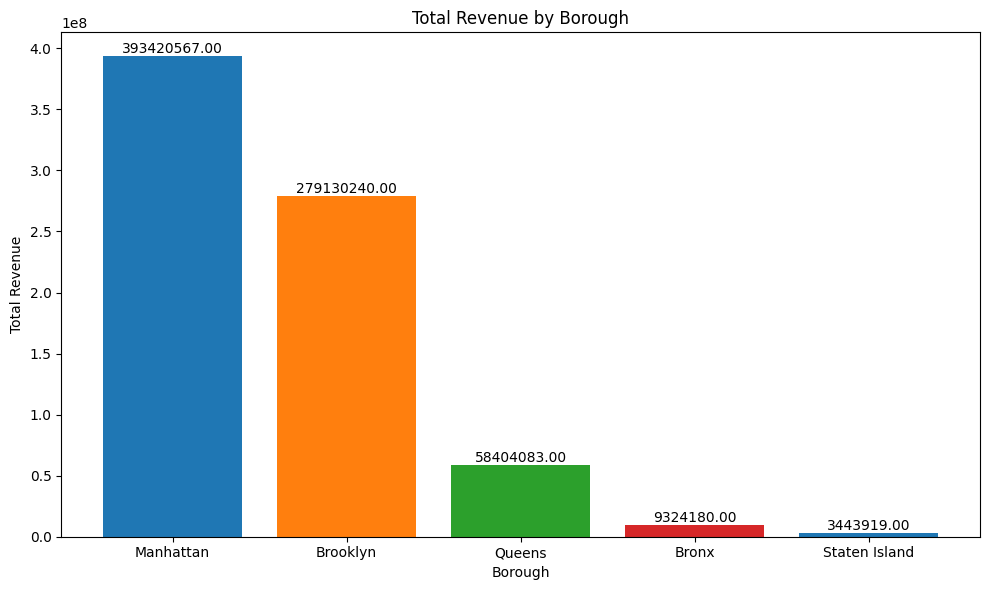

In [63]:
# Sort the DataFrame by total_revenue in descending order
sorted_revenue = revenue_host_borough.sort_values('total_revenue', ascending=False)

# Define color palette for color blindness friendly colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Plot the graph
plt.figure(figsize=(10, 6))
bars = plt.bar(sorted_revenue['borough'], sorted_revenue['total_revenue'], color=colors)

# Set the x-axis label, y-axis label, and title
plt.xlabel('Borough')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Borough')

# Display the values on each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [64]:
# What is the average price per month for listings in each neighborhood?

In [65]:
query8 = '''SELECT p.neighbourhood, rt.room_type, AVG(p.price_per_month) AS average_price_per_month
FROM prices AS p
JOIN room_types AS rt
ON p.listing_id = rt.listing_id
GROUP BY 1,2
ORDER BY 3 DESC; '''

In [66]:
avg_price_monthly_neighbourhood = sqldf(query8)

In [67]:
print(avg_price_monthly_neighbourhood)

         neighbourhood        room_type  average_price_per_month
0             Sea Gate  entire home/apt             24485.416667
1              Tribeca  entire home/apt             13707.575000
2              Bayside  entire home/apt             12133.484848
3    Flatiron District  entire home/apt             11766.180555
4                 SoHo  entire home/apt             11674.970472
..                 ...              ...                      ...
484          Flatlands      shared room               669.166667
485       Graniteville     private room               608.333333
486      Schuylerville      shared room               608.333333
487           Van Nest      shared room               608.333333
488      Randall Manor      shared room               395.416667

[489 rows x 3 columns]


In [68]:
# Plot the average price per month for listings in each neighborhood

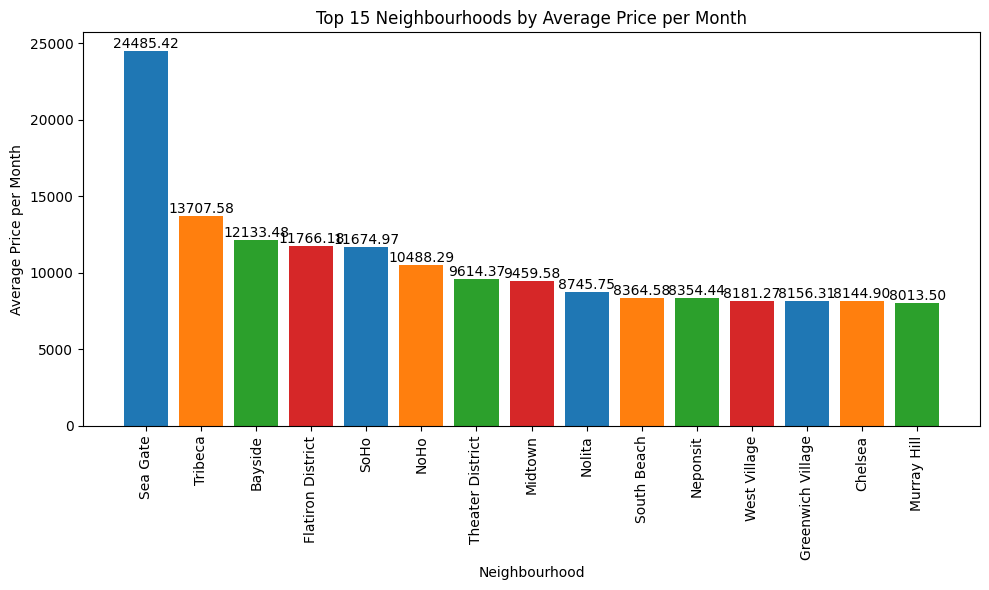

In [69]:
# Sort the DataFrame by average_price_per_month in descending order and select the top 15 rows
sorted_neighbourhoods = avg_price_monthly_neighbourhood.sort_values('average_price_per_month', ascending=False).head(15)

# Plot the graph
plt.figure(figsize=(10, 6))

# Define color palette for color blindness friendly colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Create the bar plot
bars = plt.bar(sorted_neighbourhoods['neighbourhood'], sorted_neighbourhoods['average_price_per_month'], color=colors)

# Set the x-axis label, y-axis label, and title
plt.xlabel('Neighbourhood')
plt.ylabel('Average Price per Month')
plt.title('Top 15 Neighbourhoods by Average Price per Month')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the values on each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [70]:
# How many listings have no reviews?

In [71]:
query9 = ''' SELECT COUNT(*) AS no_reviews_count
FROM reviews
WHERE listing_id NOT IN (SELECT listing_id FROM reviews); '''

In [72]:
null_reviews = sqldf(query9)

In [73]:
print(null_reviews)

   no_reviews_count
0                 0


In [74]:
# Plot null reviews

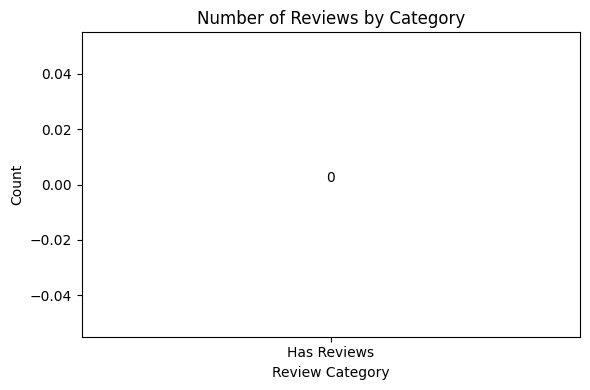

In [75]:
# Modify the SQL query to categorize the listings as having reviews or being NULL
query9 = '''
    SELECT CASE
               WHEN listing_id IS NOT NULL THEN 'Has Reviews'
               ELSE 'No Reviews'
           END AS review_category,
           COUNT(CASE WHEN listing_id IS NULL THEN 1 END) AS count
    FROM reviews
    GROUP BY review_category
'''

# Execute the modified SQL query
result = sqldf(query9)

# Plot the graph
plt.figure(figsize=(6, 4))
colors = ['#1f77b4', '#ff7f0e']
plt.bar(result['review_category'], result['count'], color=colors)
plt.xlabel('Review Category')
plt.ylabel('Count')
plt.title('Number of Reviews by Category')

# Display the values on each bar
for i, count in enumerate(result['count']):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()



In [76]:
# What is the average price per room type for listings that have at least 100 reviews and are available more than 200 days a year?

In [77]:
query11 = ''' SELECT rt.room_type, ROUND(AVG(p.price),2) AS average_price
FROM room_types AS rt
JOIN prices AS p ON rt.listing_id = p.listing_id
JOIN reviews AS r ON rt.listing_id = r.listing_id
WHERE r.number_of_reviews >= 100 AND r.availability_365 > 200
GROUP BY rt.room_type; '''

In [78]:
price_reviews_available = sqldf(query11)

In [79]:
print(price_reviews_available)

         room_type  average_price
0  entire home/apt         179.54
1     private room          85.41
2      shared room          59.19


In [80]:
# Plot the average price per room type for listings that have at least 100 reviews and are available more than 200 days a year

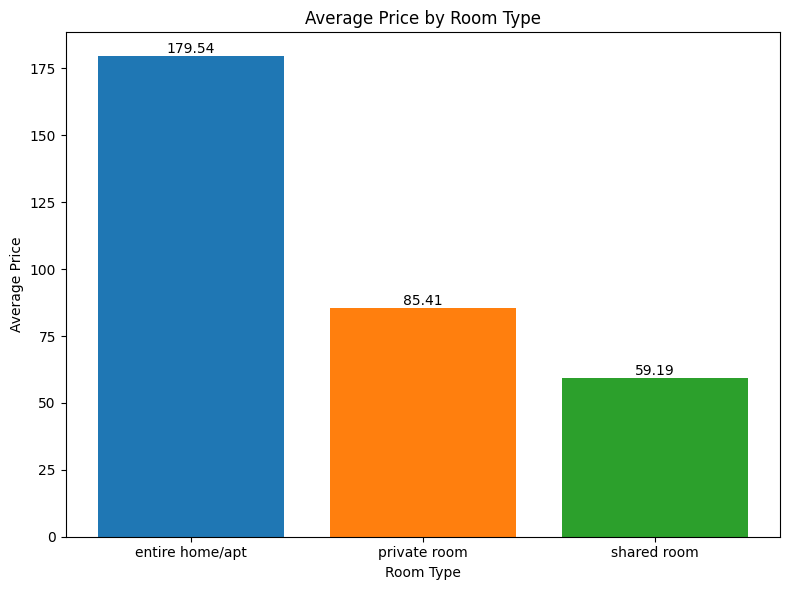

In [81]:
# Define a color-blind friendly color palette
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Plot the graph
plt.figure(figsize=(8, 6))
plt.bar(price_reviews_available['room_type'], price_reviews_available['average_price'], color=colors)
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.title('Average Price by Room Type')

# Display the values on each bar
for i, value in enumerate(price_reviews_available['average_price']):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [82]:
# How many hosts have more than one listing, and what's the maximum number of listings by a single host name?

In [83]:
query12 = ''' SELECT COUNT(DISTINCT host_name) AS hosts_with_multiple_listings,
       MAX(listing_count) AS max_listings_by_single_host
FROM (
    SELECT host_name, COUNT(*) AS listing_count
    FROM reviews
    GROUP BY host_name
    HAVING COUNT(*) > 1
) AS subquery;'''

In [84]:
host_max_count = sqldf(query12)

In [85]:
print(host_max_count)

   hosts_with_multiple_listings  max_listings_by_single_host
0                          2929                          215


In [86]:
# Plot a graph of hosts having more than one listing

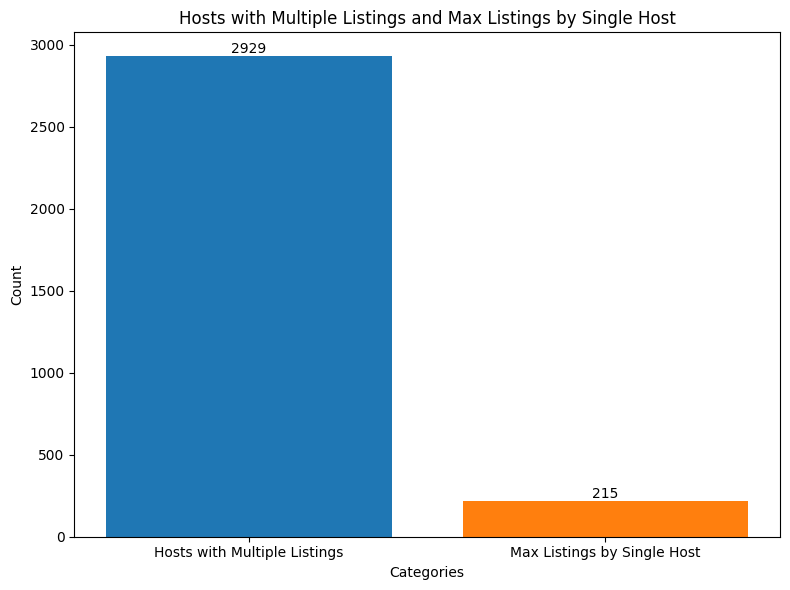

In [87]:
# Define a color-blind friendly color palette
colors = ['#1f77b4', '#ff7f0e']

# Plot the graph
plt.figure(figsize=(8, 6))
plt.bar(['Hosts with Multiple Listings', 'Max Listings by Single Host'],
        [host_max_count['hosts_with_multiple_listings'][0], host_max_count['max_listings_by_single_host'][0]],
        color=colors)
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Hosts with Multiple Listings and Max Listings by Single Host')

# Display the values on each bar
for i, value in enumerate([host_max_count['hosts_with_multiple_listings'][0], host_max_count['max_listings_by_single_host'][0]]):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [88]:
# Determine the top 5 hosts who have the highest price_per_month for their listings, considering only hosts who have at least 10 listings.

In [89]:
query13 = ''' SELECT r.host_name, ROUND(avg(p.price_per_month),2) AS average_price_per_month
FROM reviews AS r
INNER JOIN prices AS p
   USING (listing_id)
GROUP BY r.host_name
HAVING COUNT(r.listing_id) >= 10
ORDER BY average_price_per_month DESC
LIMIT 5;'''

In [90]:
top5host_highest_price = sqldf(query13)

In [91]:
print(top5host_highest_price)

    host_name  average_price_per_month
0  Red Awning                 21452.58
1      Alyssa                 15734.78
2       Sally                 13912.58
3      Sandra                 12910.05
4       Allan                  8925.91


In [92]:
# plot showing the top 5 hosts with the highest average price per month

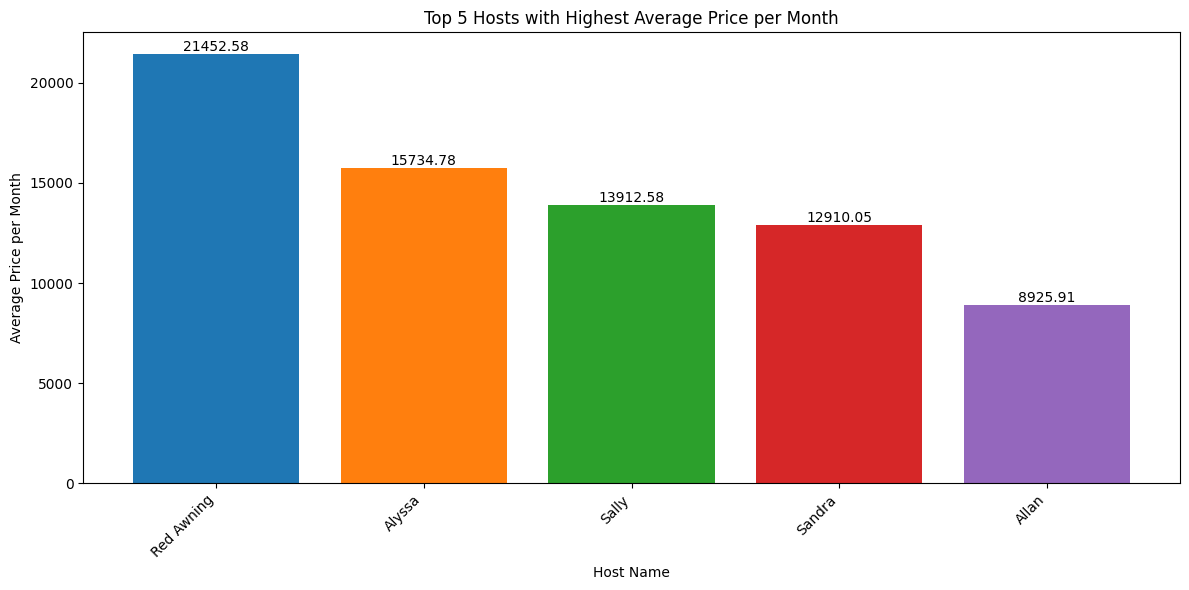

In [93]:

# Define a color-blind friendly color palette
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Plot the graph
plt.figure(figsize=(12, 6))
plt.bar(top5host_highest_price['host_name'], top5host_highest_price['average_price_per_month'], color=colors)
plt.xlabel('Host Name')
plt.ylabel('Average Price per Month')
plt.title('Top 5 Hosts with Highest Average Price per Month')
plt.xticks(rotation=45, ha='right')

# Display the values on each bar
for i, value in enumerate(top5host_highest_price['average_price_per_month']):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()



In [94]:
# Calculate the average price_per_month for each neighborhood, taking into account only listings where the host has a minimum_nights value that is higher than the average minimum_nights value across all listings.

In [95]:
query14 = ''' SELECT p.neighbourhood, ROUND(AVG(p.price_per_month), 2) AS average_price_per_month
FROM prices p
WHERE p.listing_id IN (
    SELECT r.listing_id
    FROM reviews r
    WHERE r.minimum_nights > (
        SELECT AVG(minimum_nights)
        FROM reviews
    )
)
GROUP BY p.neighbourhood; '''

In [96]:
avgPrice_neighbourhood = sqldf(query14)

In [97]:
print(avgPrice_neighbourhood)

         neighbourhood  average_price_per_month
0             Allerton                  2661.46
1        Arden Heights                  2326.88
2              Astoria                  2880.06
3           Bath Beach                  1003.75
4    Battery Park City                  6144.17
..                 ...                      ...
150     Williamsbridge                  1482.81
151       Williamsburg                  4094.30
152    Windsor Terrace                  3327.12
153          Woodhaven                  2363.81
154           Woodside                  1425.47

[155 rows x 2 columns]


In [98]:
# plot a graph using the avgPrice_neighbourhood DataFrame obtained from the SQL query

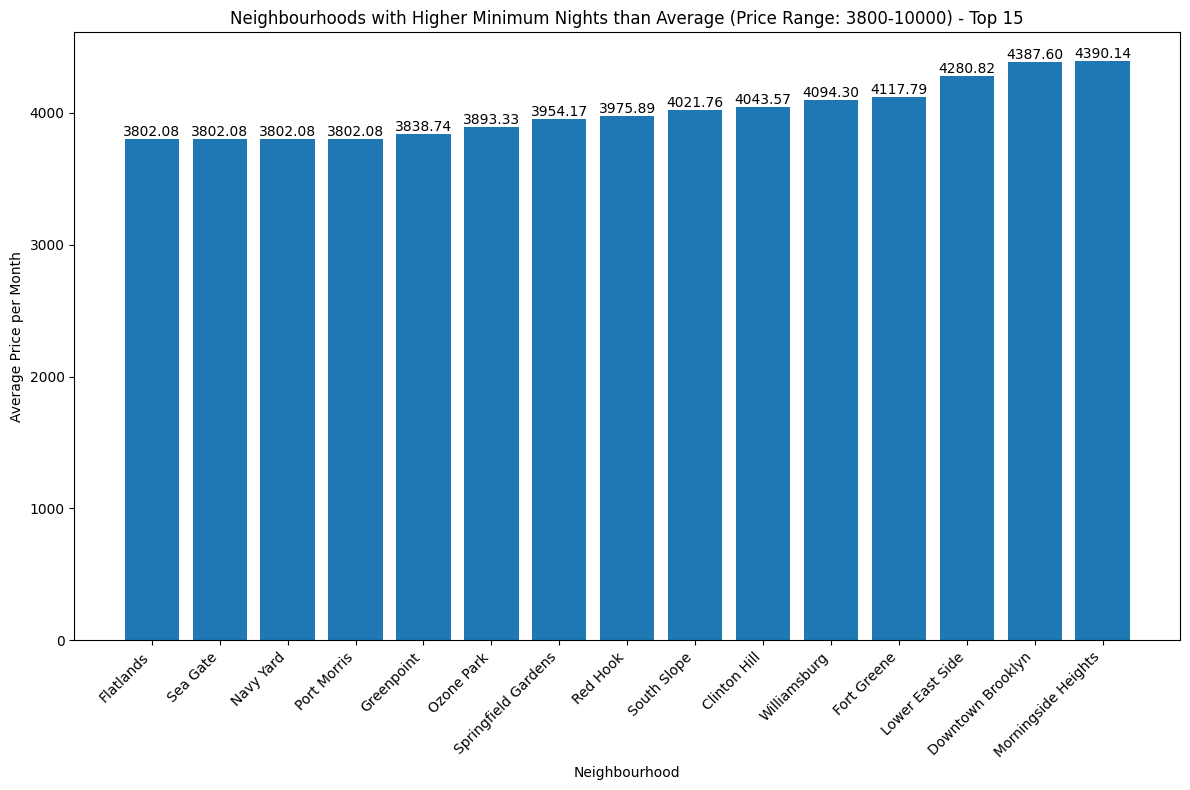

In [99]:
# Calculate the average minimum nights across all listings
avg_min_nights = reviews['minimum_nights'].mean()

# Filter the listings where the host has a minimum_nights value higher than the average
filtered_listings = prices[prices['listing_id'].isin(reviews[reviews['minimum_nights'] > avg_min_nights]['listing_id'])]

# Group by neighbourhood and calculate the average price per month
avg_price_neighbourhood = filtered_listings.groupby('neighbourhood')['price_per_month'].mean().reset_index()
sorted_neighbourhoods = avg_price_neighbourhood.sort_values('price_per_month')

# Filter the neighbourhoods based on the price range
filtered_neighbourhoods = sorted_neighbourhoods[(sorted_neighbourhoods['price_per_month'] >= 3800) & (sorted_neighbourhoods['price_per_month'] <= 10000)]

# Select the first 15 neighbourhoods
top_15_neighbourhoods = filtered_neighbourhoods.head(15)

# Plot the graph
plt.figure(figsize=(12, 8))  # Adjust the figure size

# Create the bar plot
plt.bar(top_15_neighbourhoods['neighbourhood'], top_15_neighbourhoods['price_per_month'])

# Set the x-axis label, y-axis label, and title
plt.xlabel('Neighbourhood')
plt.ylabel('Average Price per Month')
plt.title('Neighbourhoods with Higher Minimum Nights than Average (Price Range: 3800-10000) - Top 15')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the values on each bar
for i, value in enumerate(top_15_neighbourhoods['price_per_month']):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [101]:
# How do the estimated book days correlate with the price of an Airbnb listing in New York City?

In [102]:

# Calculate the correlation
correlation = pd.merge(reviews, prices, on='listing_id')['booked_days_365'].corr(pd.merge(reviews, prices, on='listing_id')['price'])

# Print the correlation
print(f"Correlation between booked days and price: {correlation}")



Correlation between booked days and price: -0.0796388397666691


In [103]:
# Plot a graph to estimate book days correlatation with the price 

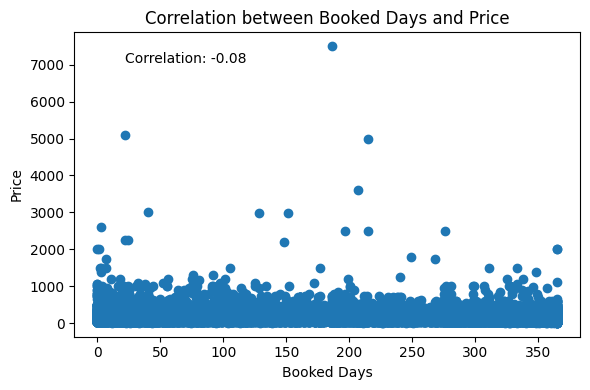

In [104]:
# Calculate the correlation
merged_df = pd.merge(reviews, prices, on='listing_id')
correlation = merged_df['booked_days_365'].corr(merged_df['price'])

# Plot the graph
plt.figure(figsize=(6, 4))
plt.scatter(merged_df['booked_days_365'], merged_df['price'], color='#1f77b4')
plt.xlabel('Booked Days')
plt.ylabel('Price')
plt.title('Correlation between Booked Days and Price')

# Display the correlation value on the graph
plt.text(0.1, 0.9, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()


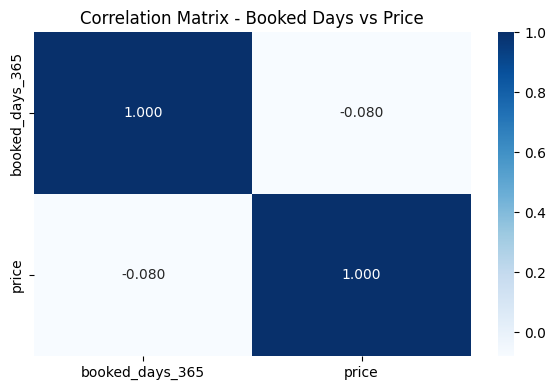

In [118]:
# Merge the dataframes
merged_df = pd.merge(reviews, prices, on='listing_id')

# Calculate the correlation matrix
correlation_matrix = merged_df[['booked_days_365', 'price']].corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.3f')  # Set fmt='.3f' for three digits after decimal
plt.title('Correlation Matrix - Booked Days vs Price')

plt.tight_layout()
plt.show()


In [424]:
# Find the neighborhood(s) that have the highest variance in listing prices.

In [125]:
# Calculate the price variance for each neighborhood
variance_df = prices.groupby('neighbourhood')['price'].var().reset_index()
variance_df['price_variance'] = variance_df['price'].round(1)

# Find the maximum variance
max_variance = variance_df['price_variance'].max()

# Filter the DataFrame to include only the neighborhoods with maximum variance
neighborhoods_with_max_variance = variance_df[variance_df['price_variance'] == max_variance]

# Display the result
print("Neighborhoods with maximum price variance:")
for _, row in neighborhoods_with_max_variance.iterrows():
    neighborhood = row['neighbourhood']
    variance = row['price_variance']
    print(f"{neighborhood}: {variance}")



Neighborhoods with maximum price variance:
Sea Gate: 924800.0


In [126]:
# Plot a graph to Find the neighborhood(s) that have the highest variance in listing prices

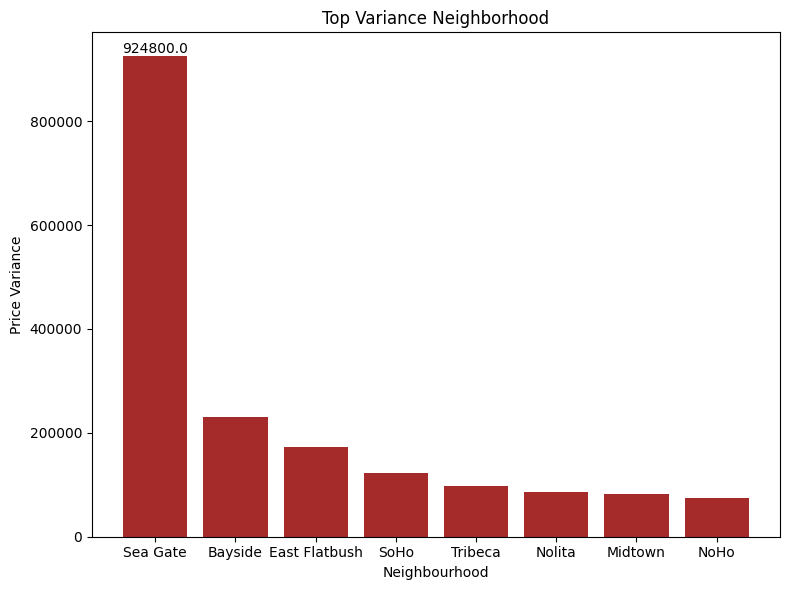

In [175]:
# Sort the neighborhoods by price variance in descending order
variance_df = variance_df.sort_values('price_variance', ascending=False)

# Select the top variance neighborhood
top_variance = variance_df.head(8)

# Create a bar plot for the top variance neighborhood
plt.figure(figsize=(8, 6))
plt.bar(top_variance['neighbourhood'], top_variance['price_variance'], color='brown')

# Set the x-axis label, y-axis label, and title
plt.xlabel('Neighbourhood')
plt.ylabel('Price Variance')
plt.title('Top Variance Neighborhood')

# Display the value on top of the bar
value = top_variance['price_variance'].values[0]
plt.text(0, value, f'{value:.1f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()
